# Startup & Load Data


**Clear variables**

In [183]:
%reset
print("--- Workspace clean ---")

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
--- Workspace clean ---


---
**Main Maths and Graph Libs.**

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns   # matplotlib graph styles
import string           #alphabet seq.
print("--- Libs. Load OK ---")

--- Libs. Load OK ---


---
**Load data from colab files**

PS: The files are manually loaded from your computer

In [185]:
from google.colab import files
uploaded = files.upload()

FILE = 'X_train.csv'

alphabet_string = list(string.ascii_uppercase) # alphabet string for column names
temp = pd.read_csv(FILE)
[rows, columns] = temp.shape
del alphabet_string[columns:] # update values
del temp

data = pd.read_csv(FILE, names=alphabet_string) # panda dataframe
x = [x for x in range(len(data))]
[rows, columns] = data.shape # update values
print("--- CSV loaded:", FILE, "---")
print("--- Those are the training data ---")


Saving X_test.csv to X_test.csv
Saving X_train.csv to X_train.csv
Saving y_test.csv to y_test.csv
--- CSV loaded: X_train.csv ---
--- Those are the training data ---


# Train Data Pre-processing

Preview the some lines of the loaded data 

In [186]:
pd.set_option('display.max_columns', 21)
print("--- Check the training data ---")
print("--- Column automatic named in alphabetical order ---")
data

--- Check the training data ---
--- Column automatic named in alphabetical order ---


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T
0,1.356205,-1.509168,0.286767,1.945567,1.356205,0.874246,0.874246,-1.509168,1.945567,-1.760478,-0.375705,0.509557,-0.164318,-1.595699,1.356205,-3.983082,-1.595699,-4.403218,1.893802,0.945089
1,-0.899063,-0.480603,-1.670255,-2.282391,-0.899063,-1.076536,-1.076536,-0.480603,-2.282391,-0.472103,1.144313,1.061767,0.185259,-2.876827,-0.899063,-0.430605,-2.876827,1.694226,1.799027,2.771487
2,-2.323976,-3.348052,0.607788,0.425983,-2.323976,-0.387229,-0.387229,-3.348052,0.425983,-5.142310,0.164442,4.493414,-2.402873,-7.267695,-2.323976,-3.394197,-7.267695,-4.420329,2.168286,4.533912
3,0.437791,-0.362643,0.227631,-0.078306,0.437791,2.358362,2.358362,-0.362643,-0.078306,-0.445158,-1.464171,0.544595,-2.652340,0.837214,0.437791,-0.762070,0.837214,-4.422075,1.357079,0.332415
4,-1.550006,-0.540902,2.407810,2.205159,-1.550006,-1.106735,-1.106735,-0.540902,2.205159,-1.901841,0.062618,1.879379,0.171096,-3.137197,-1.550006,-0.883804,-3.137197,-1.191569,-1.025149,-0.440226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-2.413710,-0.443268,2.058560,1.359251,-2.413710,-0.990337,-0.990337,-0.443268,1.359251,-2.016212,-0.277020,1.982377,-0.551996,-2.627167,-2.413710,0.867176,-2.627167,-0.271585,-1.668810,0.093281
796,-0.284327,0.433605,-0.015024,-1.495839,-0.284327,-0.522847,-0.522847,0.433605,-1.495839,1.058976,0.972099,0.605501,-0.259123,-0.566923,-0.284327,0.368807,-0.566923,1.287730,0.299024,-0.535741
797,-1.812875,0.733149,1.511783,0.585571,-1.812875,2.032046,2.032046,0.733149,0.585571,-0.451000,-2.765765,-0.049766,-3.015062,3.478725,-1.812875,4.547681,3.478725,-1.456299,-2.975360,-1.180135
798,-0.456405,-1.693031,0.572624,1.661785,-0.456405,2.517101,2.517101,-1.693031,1.661785,-3.165540,-2.514301,1.190391,-3.016347,-0.464272,-0.456405,-1.157819,-0.464272,-6.184320,0.836462,2.105372


---
Calculate basic data description

In [187]:
print("--- Basic train data description ---")
data.describe()
#data.isnull().values.any()

--- Basic train data description ---


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T
count,800.000000,799.000000,800.000000,797.000000,799.000000,798.000000,800.000000,797.000000,800.000000,800.000000,800.000000,799.000000,800.000000,800.000000,798.000000,800.000000,799.000000,798.000000,798.000000,799.000000
mean,0.047461,-0.706970,1.037520,1.656725,0.046262,1.008276,1.007402,-0.396156,1.405495,-0.952244,-1.024250,0.410069,-1.006458,0.080888,-1.150658,-0.720617,0.078463,-2.889728,-0.046938,-0.296307
std,1.537837,8.885709,1.626193,7.298238,1.538427,1.391843,1.390638,0.990328,1.741206,1.287950,1.318148,1.265508,1.206679,2.713672,33.865586,2.487457,2.714505,2.126488,1.907868,2.055876
min,-4.033282,-250.000000,-4.632913,-5.462117,-4.033282,-3.638322,-3.638322,-3.734470,-5.462117,-5.142310,-5.193100,-3.787852,-5.276130,-8.266196,-955.630737,-7.210789,-8.266196,-7.488018,-6.062161,-6.125176
25%,-1.088576,-0.975884,0.018412,0.422669,-1.089551,0.015114,0.013142,-0.975262,0.423116,-1.802960,-1.920871,-0.415316,-1.815317,-1.647525,-1.093178,-2.439898,-1.648861,-4.479174,-1.377952,-1.670467
50%,-0.010010,-0.331962,1.007188,1.553990,-0.012714,0.979104,0.979104,-0.331962,1.553665,-0.913217,-1.023541,0.467791,-0.941122,0.043279,-0.013200,-0.799814,0.042923,-3.380807,-0.001168,-0.401661
75%,1.129617,0.285468,2.103495,2.589810,1.133408,2.010845,2.006817,0.285124,2.583172,-0.101136,-0.136942,1.175405,-0.232511,1.908024,1.125374,1.223030,1.900225,-1.201255,1.317958,1.176151
max,4.555935,2.862579,5.436768,201.474335,4.555935,5.307283,5.307283,2.862579,7.520541,3.044570,2.688103,4.493414,3.322378,9.170311,4.555935,5.130752,9.170311,3.082953,4.987530,5.578776


---
**Delete outliers**

PS: We defined outliers as a value that is more than 3 standard deviations (99.7%) from the mean. Attention here, we are supposing data to be described as normal data, this might provoke a small percentage data loss in the lower and top end.

In [188]:
data_zscore = (data - data.mean())/data.std() # Calculate the standard score
abs_z_scores = np.abs(data_zscore)

filtered_entries = (abs_z_scores < 3).all(axis=1) # Outlier -> We defined as a value that is more than 3 standard deviations (99.7%) from the mean.
data_filtered = data[filtered_entries]
print("--- Outlayers removed ---")

--- Outlayers removed ---


---
**Check and remove duplicate columns**

PS: The function `getDuplicateColumns` does the auto check for duplicate columns





In [189]:
from scipy.stats import pearsonr

def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal

            corr, _ = pearsonr(col, otherCol) 
            if corr > 0.99: # OLD line: if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

# REF: https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/ + adaptação correlação

print("--- Function loaded ---")

--- Function loaded ---


In [190]:
duplicateColumnNames = getDuplicateColumns(data_filtered)
print("--- Deleted dataframe col.:", duplicateColumnNames, " ---")

data_filtered = data_filtered.drop(columns=getDuplicateColumns(data_filtered)) # Delete duplicate columns (only works if columns are 100% equal)
print("--- Check the updated dataframe: ---")
data_filtered 

--- Deleted dataframe col.: ['G', 'H', 'I', 'O', 'Q', 'E']  ---
--- Check the updated dataframe: ---


,A,B,C,D,F,J,K,L,M,N,P,R,S,T
0,1.356205,-1.509168,0.286767,1.945567,0.874246,-1.760478,-0.375705,0.509557,-0.164318,-1.595699,-3.983082,-4.403218,1.893802,0.945089
1,-0.899063,-0.480603,-1.670255,-2.282391,-1.076536,-0.472103,1.144313,1.061767,0.185259,-2.876827,-0.430605,1.694226,1.799027,2.771487
3,0.437791,-0.362643,0.227631,-0.078306,2.358362,-0.445158,-1.464171,0.544595,-2.652340,0.837214,-0.762070,-4.422075,1.357079,0.332415
4,-1.550006,-0.540902,2.407810,2.205159,-1.106735,-1.901841,0.062618,1.879379,0.171096,-3.137197,-0.883804,-1.191569,-1.025149,-0.440226
5,-0.853613,-0.348163,-0.619060,-0.374499,-0.337948,-0.996757,-0.130235,0.462139,0.036540,-1.388654,0.124742,0.287287,0.484055,1.810847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,-0.350116,-0.711195,0.423109,0.598522,-0.380825,-1.100166,0.215854,0.875178,-0.015886,-1.703459,-1.052933,-0.788486,0.233212,0.577731
795,-2.413710,-0.443268,2.058560,1.359251,-0.990337,-2.016212,-0.277020,1.982377,-0.551996,-2.627167,0.867176,-0.271585,-1.668810,0.093281
796,-0.284327,0.433605,-0.015024,-1.495839,-0.522847,1.058976,0.972099,0.605501,-0.259123,-0.566923,0.368807,1.287730,0.299024,-0.535741
797,-1.812875,0.733149,1.511783,0.585571,2.032046,-0.451000,-2.765765,-0.049766,-3.015062,3.478725,4.547681,-1.456299,-2.975360,-1.180135


**Dataframe to be used**

Calculate basic dataframe description

In [191]:
print("--- Check the dataframe description (after pre-processing): ---")
data_filtered.describe()

--- Check the dataframe description (after pre-processing): ---


,A,B,C,D,F,J,K,L,M,N,P,R,S,T
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000
mean,0.060634,-0.385566,1.070592,1.464959,1.014990,-0.956118,-1.044560,0.392711,-0.987347,0.103625,-0.734295,-2.925832,-0.072067,-0.328663
std,1.540834,0.939017,1.550733,1.617047,1.346969,1.220271,1.245968,1.215408,1.178070,2.574400,2.450371,2.084175,1.841752,1.972661
min,-4.033282,-3.228589,-3.566237,-3.504998,-2.664869,-3.932526,-4.824867,-3.265807,-4.384934,-6.942796,-7.210789,-7.488018,-4.777795,-6.125176
25%,-1.086110,-0.945013,0.061593,0.500127,0.043329,-1.792837,-1.907829,-0.415999,-1.758264,-1.576877,-2.431166,-4.521365,-1.362007,-1.653718
50%,-0.001531,-0.314971,1.033855,1.562271,0.991708,-0.903569,-1.028062,0.462139,-0.930446,0.054308,-0.826926,-3.403231,-0.024598,-0.416261
75%,1.157406,0.285124,2.064344,2.583060,1.997753,-0.119750,-0.195682,1.138338,-0.211921,1.885899,1.170857,-1.237625,1.280668,1.118714
max,4.555935,2.222076,5.436768,6.476761,4.608690,2.397031,2.606046,3.843423,2.274897,7.643921,5.130752,2.657652,4.497033,5.578776


**Dataframe Histograms (this will be used for training models)**

--- Check the dataframe histogram (after pre-processing): ---


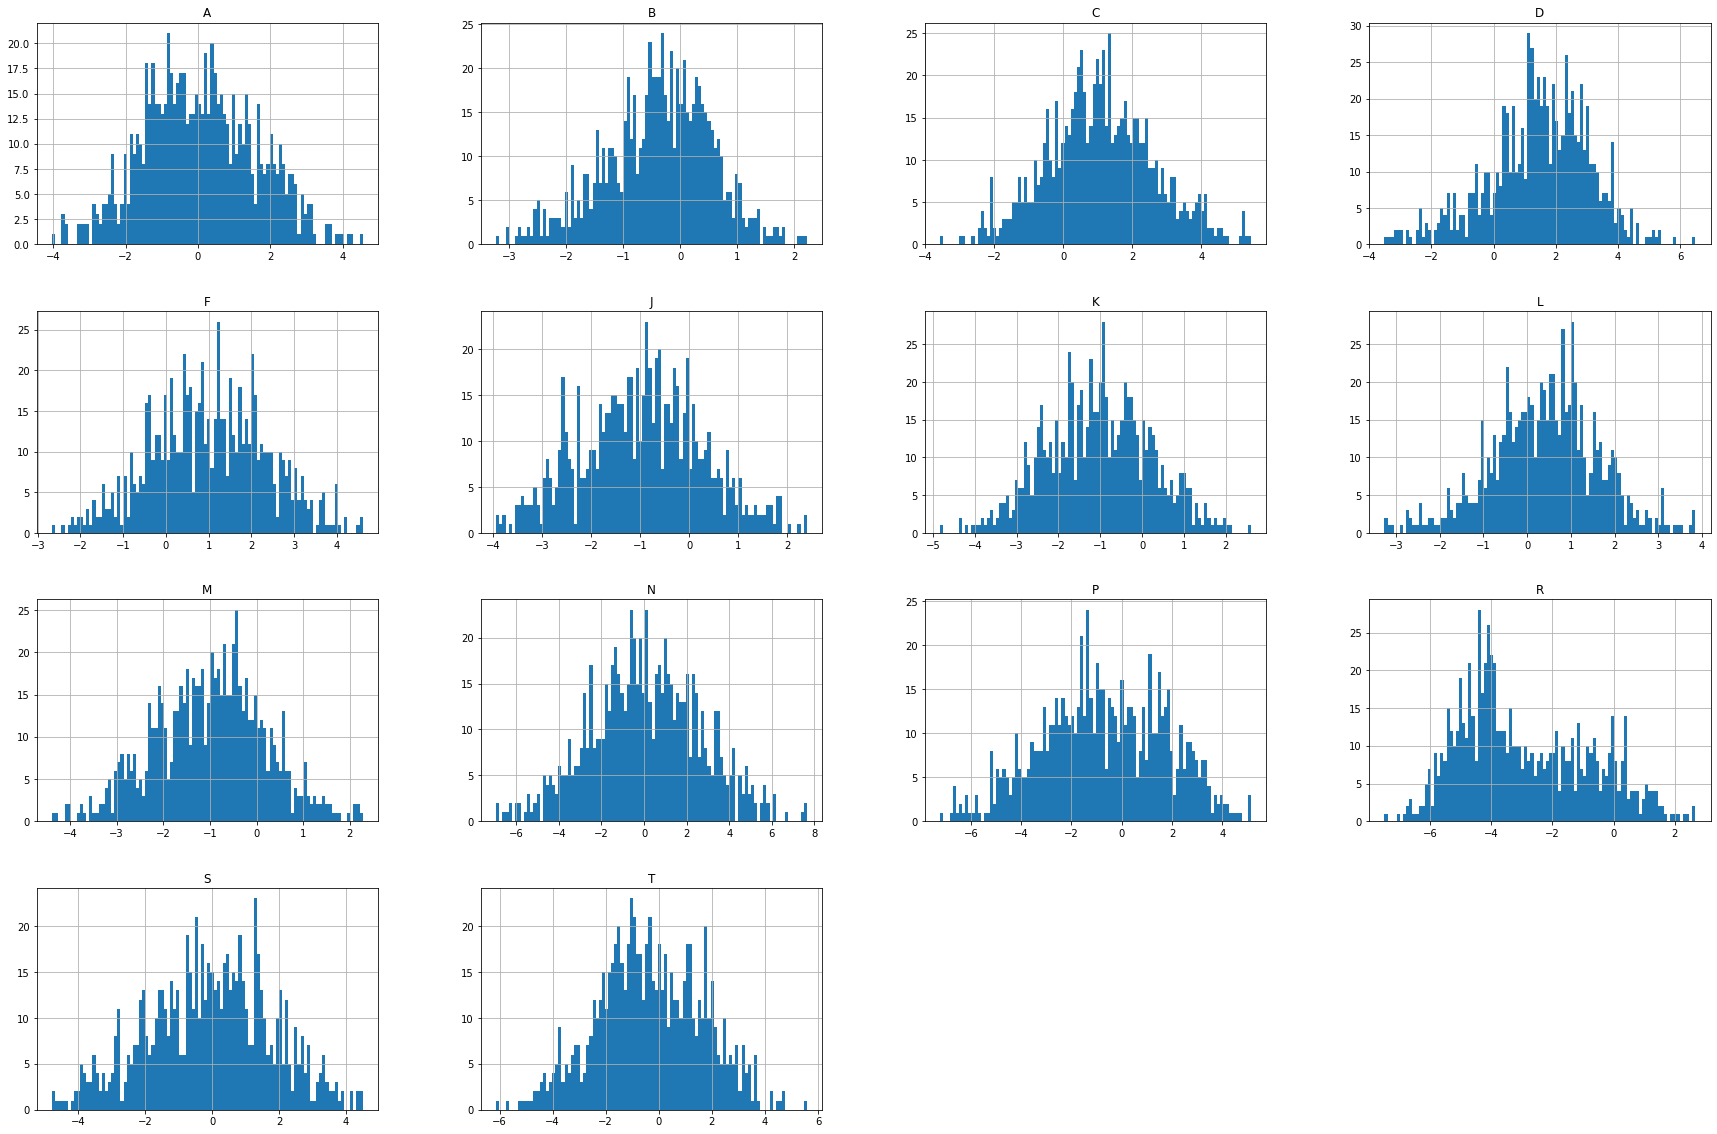

In [192]:
print("--- Check the dataframe histogram (after pre-processing): ---")
data_filtered.hist(figsize=(30,20), bins = 100)
plt.show()

# Unsupervised clustering with POPC

**Check for relevant columns**

We are looking for column data that have two distributions.

Our hypothesis is that this data will have two distribution and will probably will not be normal.

In [193]:
alpha = 0.05

normal_test_df = {} # debug
normal_df_list = set()

for col in data_filtered:
  x = data_filtered[col]
  k2, p = stats.normaltest(x)
  #print("p = {:g}".format(p))

  normal_test_df[col] = 'Not classified'

  if p < alpha:  # null hypothesis: x comes from a normal distribution
      normal_test_df[col] = 'Non-normal'
  else:
      normal_test_df[col] = 'Normal'
      normal_df_list.add(col)#df.columns.values[y]

print("--- Check the distribution of the columns ---")
normal_test_df

--- Check the distribution of the columns ---


{'A': 'Non-normal',
 'B': 'Non-normal',
 'C': 'Normal',
 'D': 'Non-normal',
 'F': 'Normal',
 'J': 'Normal',
 'K': 'Normal',
 'L': 'Normal',
 'M': 'Normal',
 'N': 'Normal',
 'P': 'Non-normal',
 'R': 'Non-normal',
 'S': 'Non-normal',
 'T': 'Normal'}

---
**See the dataset to be diagnosed**

This is the filtered dataframe to be used on clustering


In [194]:
print("--- Deleted dataframe col.:", normal_df_list, "---")

data_for_cluster_detect = data_filtered.drop(columns=normal_df_list) # Delete duplicate columns (only works if columns are 100% equal)
print("--- Check the updated dataframe: ---")
data_for_cluster_detect

--- Deleted dataframe col.: {'J', 'F', 'T', 'C', 'K', 'L', 'M', 'N'} ---
--- Check the updated dataframe: ---


,A,B,D,P,R,S
0,1.356205,-1.509168,1.945567,-3.983082,-4.403218,1.893802
1,-0.899063,-0.480603,-2.282391,-0.430605,1.694226,1.799027
3,0.437791,-0.362643,-0.078306,-0.762070,-4.422075,1.357079
4,-1.550006,-0.540902,2.205159,-0.883804,-1.191569,-1.025149
5,-0.853613,-0.348163,-0.374499,0.124742,0.287287,0.484055
...,...,...,...,...,...,...
794,-0.350116,-0.711195,0.598522,-1.052933,-0.788486,0.233212
795,-2.413710,-0.443268,1.359251,0.867176,-0.271585,-1.668810
796,-0.284327,0.433605,-1.495839,0.368807,1.287730,0.299024
797,-1.812875,0.733149,0.585571,4.547681,-1.456299,-2.975360


--- Check the updated dataframe histogram ---


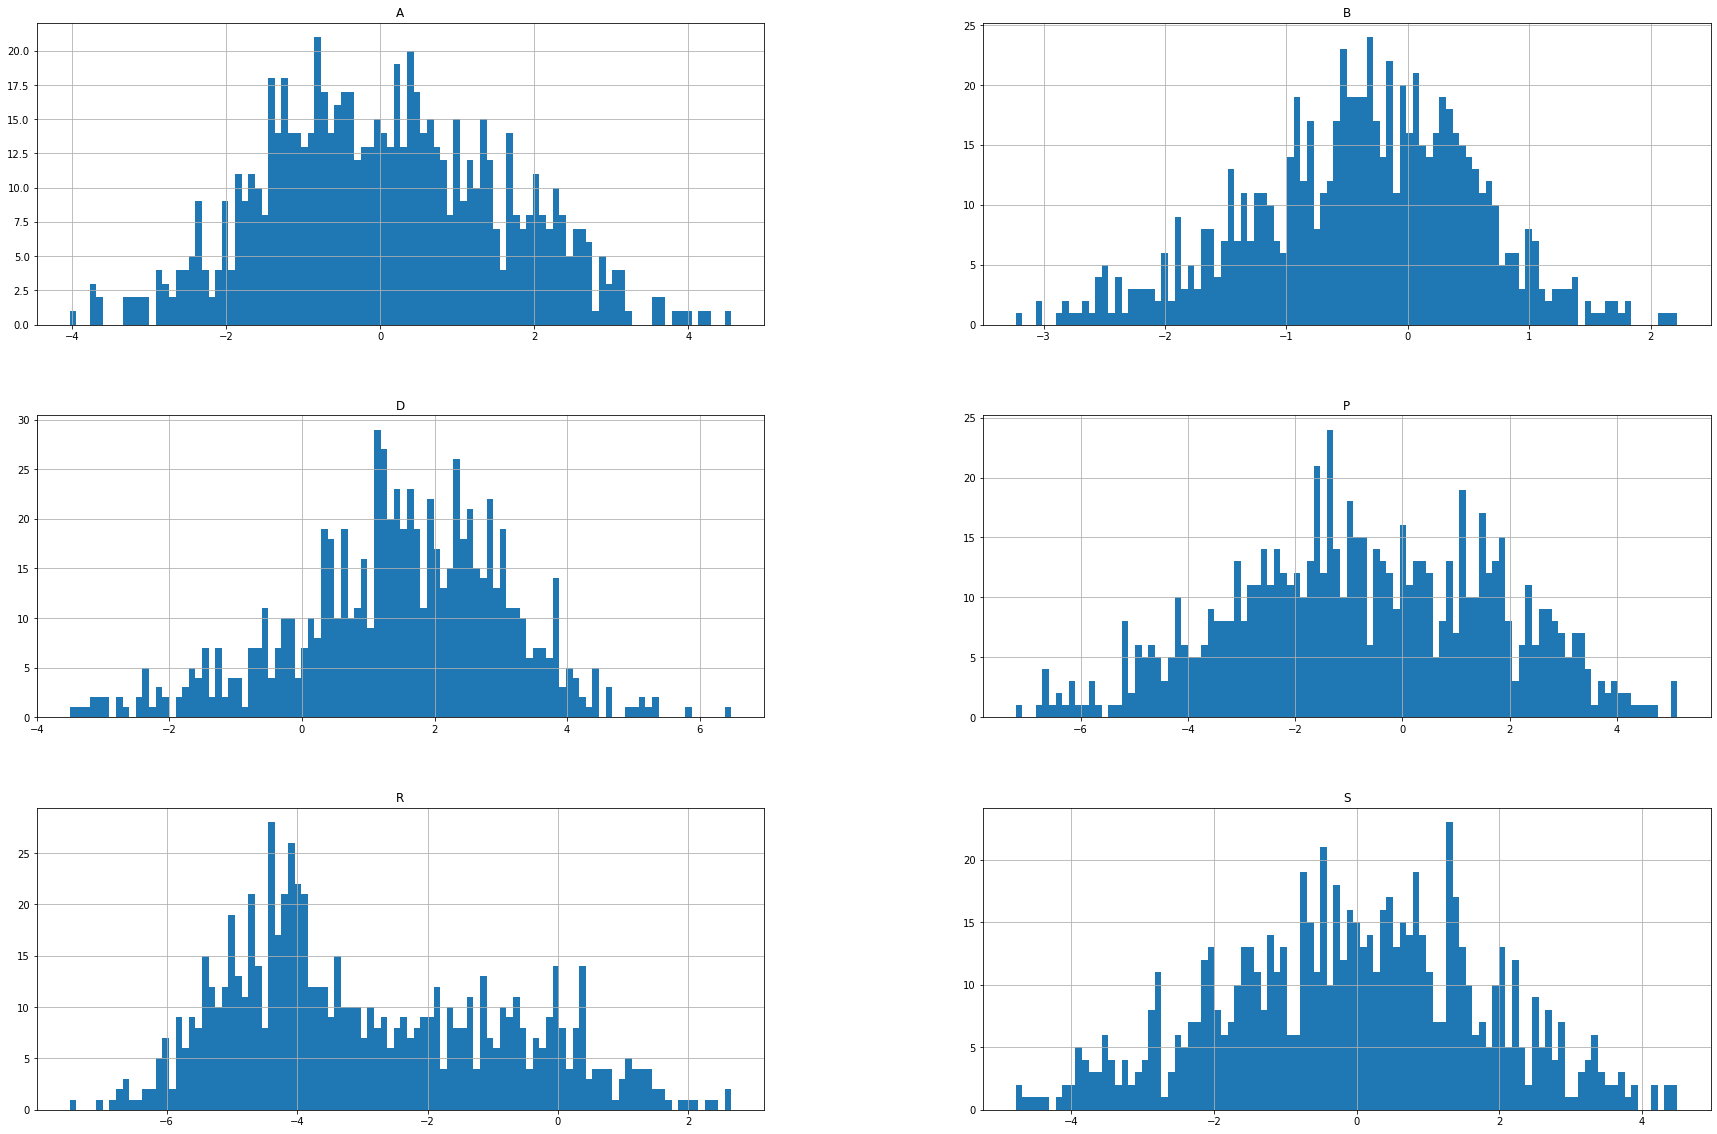

In [195]:
print("--- Check the updated dataframe histogram ---")
data_for_cluster_detect.hist(figsize=(30,20), bins = 100)
plt.show()

---
**Powered Outer Probabilistic Clustering (POPC)**

We used the POPC method for clustering as [1]. 'Normal' k-means is common used in ML but was avoided as it is not recommended for binary data. k-means is a 'adapted 'back-propagation method. POPC seens to work well in the SENAI ISI data.

[1] REF Article: Powered Outer Probabilistic Clustering, Peter Taraba, 2017

REF: https://github.com/pepe78/POPC-examples-python


In [196]:
from sklearn.cluster import KMeans

def deltaIfRemoved(row, counts, countsAll, numClusters, multiplier, power):
        ret = 0.0

        for i in range(len(row)):
                if row[i] == 1:
                        ret -= pow((counts[i] * multiplier + 1.0) / (countsAll[i] * multiplier + numClusters + 0.0), power)
                        ret += pow(((counts[i] - 1.0) * multiplier + 1.0) / (countsAll[i] * multiplier + numClusters + 0.0), power)

        return ret

def deltaIfAdded(row, counts, countsAll, numClusters, multiplier, power):
        ret = 0.0

        for i in range(len(row)):
                if row[i] == 1:
                        ret += pow(((counts[i] + 1.0) * multiplier + 1.0) / (countsAll[i] * multiplier + numClusters + 0.0), power)
                        ret -= pow((counts[i] * multiplier + 1.0) / (countsAll[i] * multiplier + numClusters + 0.0), power)

        return ret

def popc(samples, multiplier = 1000.0, power = 10.0):
        #kmeans = KMeans(n_clusters=int(len(samples)/2), random_state=0).fit(samples)
        kmeans = KMeans(n_clusters=int(2), random_state=0).fit(samples) # update, force 2 clusters

        labels = kmeans.labels_

        clusters = []
        clusters_counts = []
        counts_all = [0 for i in range(len(samples[0]))]
        for i in range(max(labels) + 1):
                clusters.append([])
                clusters_counts.append([0 for j in range(len(samples[0]))])

        for i in range(len(samples)):
                cs = samples[i]
                cl = labels[i]
                clusters[cl].append(i)

                for j in range(len(cs)):
                        if cs[j] == 1:
                                clusters_counts[cl][j] += 1
                                counts_all[j] += 1

        changed = True
        while changed:
                changed = False
                i = 0 
                while i < len(clusters):
                        j = 0
                        while j < len(clusters[i]):
                                largestGainWhere = -1
                                largestGain = -1.0
                                deltaBase = deltaIfRemoved(samples[clusters[i][j]], clusters_counts[i], counts_all, len(clusters), multiplier, power)
                                for k in range(len(clusters)):
                                        if i != k:
                                                delta = deltaBase + deltaIfAdded(samples[clusters[i][j]], clusters_counts[k], counts_all, len(clusters), multiplier, power)
                                                if delta > largestGain:
                                                        largestGain = delta
                                                        largestGainWhere = k
                                if largestGain > 0:
                                        changed = True
                                        cs = clusters[i][j]
                                        del clusters[i][j]
                                        clusters[largestGainWhere].append(cs)
                                        for k in range(len(samples[0])):
                                                if samples[cs][k] == 1:
                                                        clusters_counts[i][k] -= 1
                                                        clusters_counts[largestGainWhere][k] += 1
                                        j -= 1
                                j += 1
                        if len(clusters[i]) == 0:
                                del clusters[i]
                                del clusters_counts[i]
                                i -= 1
                        i += 1

        for i in range(len(clusters)):
                for j in range(len(clusters[i])):
                        labels[clusters[i][j]] = i
        
        return labels

def display(labelsWithSamples, title):
        fig = plt.gcf()
        fig.set_size_inches(12, 7)

        colors = ['b','g','r','c','m','y','k']
        labelsWithSamples = sorted(labelsWithSamples, key=lambda s: s[0])

        for i in range(len(labelsWithSamples)):
                for j in range(len(labelsWithSamples[i][1])):
                        if labelsWithSamples[i][1][j] == 1:
                                plt.plot(j, i, colors[labelsWithSamples[i][0] % 7] + 'o', markersize=1)

        plt.title(title)
        plt.show()

print("--- Functions loaded ---")

--- Functions loaded ---


--- Check the binary clustering ---


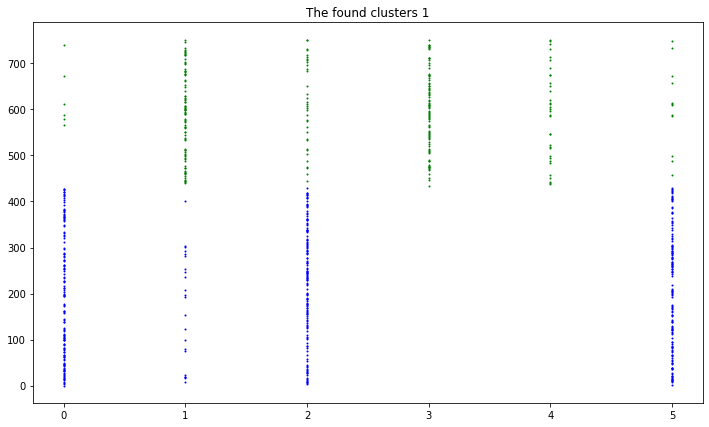

In [197]:
data_for_cluster_detect_round = data_for_cluster_detect.round(decimals=0) # round values to make it easier to the POPC algorithm
X = data_for_cluster_detect_round.values
X_index = data_for_cluster_detect_round.index
labels = popc(X)
result_clusters = []
for i in range(len(X)):
  result_clusters.append([labels[i], X[i]])

print("--- Check the binary clustering ---")
display(result_clusters, 'The found clusters {}'.format(1))

labels_df = pd.DataFrame(index=X_index)
labels_df
labels_df.insert(0, "_OUT", labels, True)

data_filtered_class = data_filtered.join(labels_df)

# Plots predicted clusters

**Some plots to see whats going on with clustering**

--- Data used for clustering: ['A', 'B', 'D', 'P', 'R', 'S'] ---


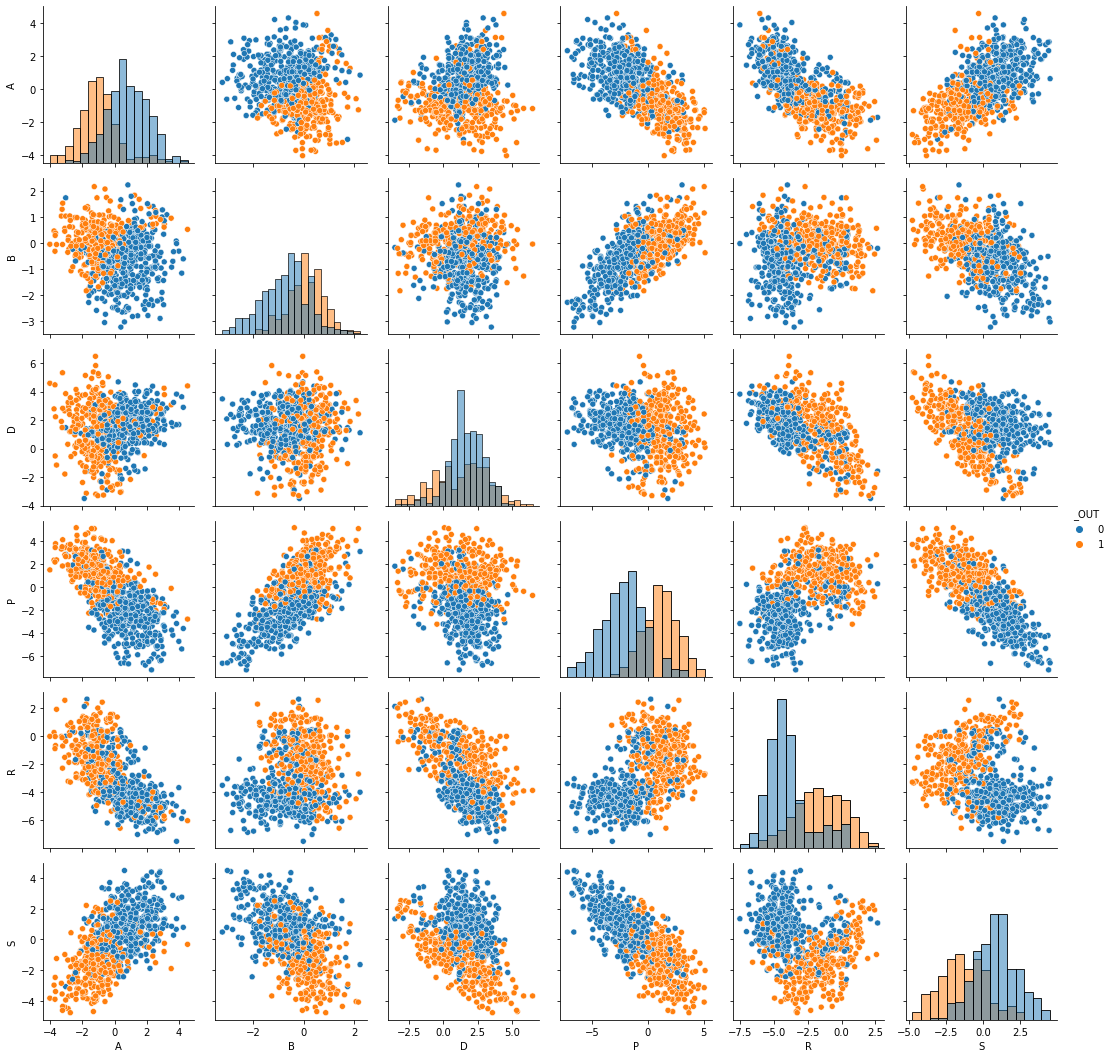

In [198]:
print("--- Data used for clustering:", data_for_cluster_detect.columns.tolist(), "---")
g = sns.PairGrid(data_for_cluster_detect.join(labels_df), hue="_OUT")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

# Load Test Data


**Load data from colab files**

PS: The files are manually added at Google Colab Files

In [199]:
FILE1 = 'X_test.csv'
FILE2 = 'y_test.csv'

alphabet_string = list(string.ascii_uppercase) # alphabet string for column names
temp = pd.read_csv(FILE1)
[rows, columns] = temp.shape
del alphabet_string[columns:] # update values
del temp

data_X_test = pd.read_csv(FILE1, names=alphabet_string) # panda dataframe
data_y_test = pd.read_csv(FILE2, names=['_OUTR']) # panda dataframe


print("--- CSV loaded:", FILE1, "&", FILE2, "---")
print("--- Those are the validation data ---")

--- CSV loaded: X_test.csv & y_test.csv ---
--- Those are the validation data ---


# ML Models

**Compare models for binary classification**

Models specified at `get_models`

We tested the 7 main models for binary classification (see [2]).
- Logistic Regression (LR)
- K-Nearest Neighbors (KNN)
- Decision Tree (DT)
- Support Vector Machine (SVM)
- Naive Bayes (NB)
- Random Forest (RF)
- Artificial Neural Network (ANN)

PS: SKlearn was used as the model library: https://scikit-learn.org/stable/

[2] REF:  Binary classification on French hospital data:
benchmark of 7 Machine Learning algorithms, Oliveira & Augusto, 2018. https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8616297 This article has a benchmark of 7 Machine Learning algorithms used on binary classification tasks. We did not test each model independently for fine tunning.

In [200]:
# OLD debug: from sklearn.datasets import make_classification
# OLD debug: X, y = make_classification(n_samples=100, n_features=4, n_informative=2, random_state=1)

X = data_filtered.to_numpy()
y = labels

# summarize the dataset
print(X.shape, y.shape)

(753, 14) (753,)


In [201]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# get a list of models to evaluate
def get_models():
	models = dict()
	models['LR'] = LogisticRegression()
	models['KNN'] = KNeighborsClassifier()
	models['CART'] = DecisionTreeClassifier()
	models['SVM'] = SVC()
	models['BAYES'] = GaussianNB()
	models['RFO'] = RandomForestClassifier()
	models['MLP'] = MLPClassifier(max_iter=500) # Original max_iter is 100, but not converge
	return models

print("--- Classic models loaded ---")

--- Classic models loaded ---


---
**Test the models performance**

We used a simple parameter here (accuracy). Future implantation can use a more sophisticated performance comparison.

--- We tested ---
- Logistic Regression (LR)
- K-Nearest Neighbors (KNN)
- Decision Tree (DT)
- Support Vector Machine (SVM)
- Naive Bayes (NB)
- Random Forest (RF)
- Artificial Neural Network (ANN)

Heres the accuracy of the models
>LR 0.805
>KNN 0.820
>CART 0.750
>SVM 0.820
>BAYES 0.830
>RFO 0.810
>MLP 0.800
--- Check the bar graph for comparison ---


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


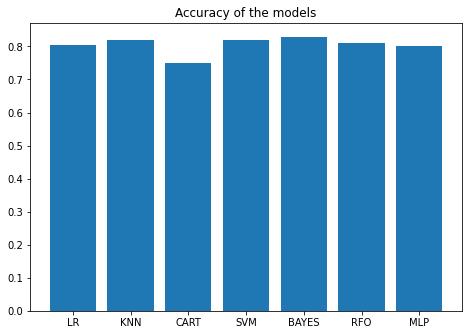

In [202]:
from sklearn.metrics import classification_report
models = get_models()

X_train = data_filtered.values # We used all the available data (maybe there is complex interactions?)
Y_train = labels_df.values
#X_test = data_X_test.values # old
X_test = data_X_test.drop(columns=duplicateColumnNames).values # Delete duplicate columns as done with the X_train
Y_test = data_y_test.values

# evaluate the models and store results
results, names = list(), list()

print("--- We tested ---")
print("- Logistic Regression (LR)\n- K-Nearest Neighbors (KNN)\n- Decision Tree (DT)\n- Support Vector Machine (SVM)\n- Naive Bayes (NB)\n- Random Forest (RF)\n- Artificial Neural Network (ANN)\n")

print("Heres the accuracy of the models")
for name, model in models.items():
  model.fit(X_train, Y_train.ravel()) # Use .ravel here, https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
  predicted = model.predict(X_test)
  report = classification_report(Y_test, predicted, output_dict=True) # Use output_dict=True to output 'text'
  results.append(report['accuracy'])
  names.append(name)
  print('>%s %.3f' % (name, report['accuracy'])) # Report variable can export more parameters from model, we used only accuracy

print("--- Check the bar graph for comparison ---")
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Accuracy of the models')
ax.bar(names,results)
plt.show()

---
**Get a stacking ensemble of models**

We add a 'stacking' model to be evaluated.

The function `get_models` is changed

The stacking method could be better optimize to test all available model combination possibilities (not done yet!). We tested the some of the combinations and we identify that the KNN+BAYES was the best performing.

We did not test further level1 models. We used the Logistic Regression due to simplicity.

In [203]:
from sklearn.ensemble import StackingClassifier

# get a stacking ensemble of models
def get_stacking():
	# define the base models
  level0 = list()
  #level0.append(('LR', LogisticRegression()))
  level0.append(('KNN', KNeighborsClassifier()))
  #level0.append(('CART', DecisionTreeClassifier()))
  #level0.append(('SVM', SVC()))
  level0.append(('BAYES', GaussianNB()))
  #level0.append(('RFO', RandomForestClassifier()))
  #level0.append(('MLP', MLPClassifier(max_iter=500)))
  # define meta learner model
  level1 = LogisticRegression()
  # define the stacking ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return model

print("--- Classic models + STACKING loaded ---")

--- Classic models + STACKING loaded ---


>LR 0.805
>KNN 0.820
>CART 0.750
>SVM 0.820
>BAYES 0.830
>RFO 0.800


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


>MLP 0.785
>stacking 0.845


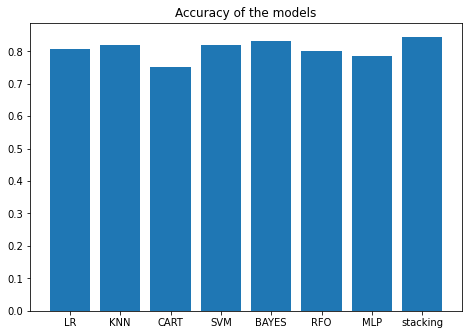

In [204]:
# get a list of models to evaluate
def get_models():
	models = dict()
	models['LR'] = LogisticRegression()
	models['KNN'] = KNeighborsClassifier()
	models['CART'] = DecisionTreeClassifier()
	models['SVM'] = SVC()
	models['BAYES'] = GaussianNB()
	models['RFO'] = RandomForestClassifier()
	models['MLP'] = MLPClassifier(max_iter=500) # Original max_iter is 100, but not converge
	models['stacking'] = get_stacking()
	return models

models = get_models() # Here we add the stacking model

# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
  model.fit(X_train, Y_train.ravel())
  predicted = model.predict(X_test)
  report = classification_report(Y_test, predicted, output_dict=True) # Use output_dict=True to output 'text'
  results.append(report['accuracy'])
  names.append(name)
  print('>%s %.3f' % (name, report['accuracy'])) # Report variable can export more parameters from model, we used only accuracy

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Accuracy of the models')
ax.bar(names,results)
plt.show()

# Make a prediction for one value

In [206]:
# Some manual test
for i in range(15):
  yhat = model.predict([X_test[i]])
  print("Predicted Class:", yhat, "The 'gold' value:", Y_test[i])

# Test single data:
data = [[1,2,3,1,2,3,1,2,3,1,2,3,1,2]]
yhat = model.predict(data)
print("Predicted Class Single data:", yhat)

Predicted Class: [0] The 'gold' value: [1.]
Predicted Class: [0] The 'gold' value: [0.]
Predicted Class: [1] The 'gold' value: [1.]
Predicted Class: [0] The 'gold' value: [0.]
Predicted Class: [1] The 'gold' value: [1.]
Predicted Class: [0] The 'gold' value: [0.]
Predicted Class: [0] The 'gold' value: [0.]
Predicted Class: [0] The 'gold' value: [0.]
Predicted Class: [0] The 'gold' value: [1.]
Predicted Class: [1] The 'gold' value: [1.]
Predicted Class: [0] The 'gold' value: [0.]
Predicted Class: [0] The 'gold' value: [0.]
Predicted Class: [1] The 'gold' value: [1.]
Predicted Class: [0] The 'gold' value: [0.]
Predicted Class: [1] The 'gold' value: [1.]
Predicted Class Single data: [1]


# Refs links for coding

LINKS


http://www.leg.ufpr.br/~wagner/MCIE/Tutorial/TutorialV.html


https://jakevdp.github.io/PythonDataScienceHandbook/04.05-histograms-and-binnings.html


https://towardsdatascience.com/unsupervised-learning-for-anomaly-detection-44c55a96b8c1


https://www.programmersought.com/article/97537162463/


https://machinelearningmastery.com/types-of-classification-in-machine-learning/